In [1]:
import tensorflow as tf
import pandas as pd

import array 
import sklearn
from sklearn.metrics import confusion_matrix
import pylab as pl
import matplotlib.pyplot as plt

FilePath = "/home/nramvinojen/Programs/Workbench/24Jan2019/"
ext = ".jpg"

#RunFolder = "28Jan2019"
#FV_count = 2048

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
print("FV len :" + str(FV_count))
print("Folder :" + RunFolder )

In [2]:
# If GPU is available: 
config = tf.ConfigProto()
config.log_device_placement = True
config.allow_soft_placement = True
config.gpu_options.allocator_type = 'BFC'

# Limit the maximum memory used
config.gpu_options.per_process_gpu_memory_fraction = 0.1

# set session config
tf.keras.backend.set_session(tf.Session(config=config))

In [5]:
# load json and create model
from keras.models import model_from_json
json_file = open(FilePath  + "Runs/" + RunFolder + "/ModelsAndWeights/Predict_DNN_Resnet2048FV_8Class_Te45_Tr47.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(FilePath + "Runs/" + RunFolder + "/ModelsAndWeights/Predict_DNN_Resnet2048FV_8Class_Te45_Tr47.h5")
print("Loaded model from disk")
loaded_model.summary()

Loaded model from disk


In [7]:
# load dataset
dataframe = pd.read_csv(FilePath +"Runs/" + RunFolder + "/FV2048_Resnet/Fixation_WeightedSum_Combined_Csv/Test_CombinedFixation_FeatureVector.csv", header=None)
X_test = dataframe.values
# load dataset
dataframe = pd.read_csv(FilePath +"Runs/" + RunFolder + "/FV2048_Resnet/Test_Label.csv", header=None)
Y_testtemp = dataframe.values
Y_test = Y_testtemp[:,0]
X_test.shape

(72, 2048)

In [8]:
predictions = loaded_model.predict(X_test)

In [20]:
#print("Predicted Labels")
y_pred = [0] * len(Y_test)
for i in range (len(Y_test)):
    a=list(predictions[i])
    y_pred[i]= a.index(max(a))
   #print(a.index(max(a)),end=" ")

In [21]:
#print("Actual Labels")
#for i in range (len(Y_test)):
   # print(int(Y_test[i]),end=" ")

In [22]:
cm = confusion_matrix(Y_test, y_pred)
print("")
print(cm)


[[4 1 1 0 0 2 0 1]
 [3 2 2 0 0 0 1 1]
 [1 0 3 2 1 1 1 0]
 [0 1 1 5 0 1 0 1]
 [0 0 0 1 6 1 0 1]
 [1 0 1 0 2 3 0 2]
 [1 1 1 0 0 0 6 0]
 [0 1 1 2 1 0 0 4]]


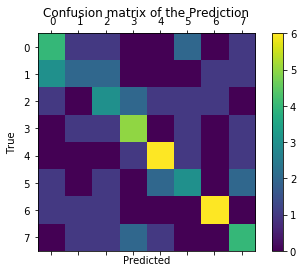

In [23]:
labels = [' 0', ' 1', ' 2', ' 3', ' 4', ' 5',' 6', ' 7']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Prediction')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels( [''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [25]:
print ('\n Summary for each class:')
print (sklearn.metrics.classification_report(Y_test, y_pred))


 Summary for each class:
             precision    recall  f1-score   support

          0       0.40      0.44      0.42         9
          1       0.33      0.22      0.27         9
          2       0.30      0.33      0.32         9
          3       0.50      0.56      0.53         9
          4       0.60      0.67      0.63         9
          5       0.38      0.33      0.35         9
          6       0.75      0.67      0.71         9
          7       0.40      0.44      0.42         9

avg / total       0.46      0.46      0.46        72

